<a href="https://colab.research.google.com/github/sysiphe0/kaggle/blob/main/kaggle_santander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## #1. read file

In [6]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt
import matplotlib
from google.colab import drive

In [2]:
def chk_dup_features(df):
  remove = []
  c = df.columns
  for i in range(len(c)-1):
    v = df[c[i]].values
    for j in range(i+1, len(c)):
      if np.array_equal(v, df[c[j]].values):
        remove.append(c[j])
  return list(set(remove))

In [3]:
def chk_constant_features(df):
  remove = []
  c = df.columns
  for i in range(len(c)-1):
    if df[c[i]].std() == 0:
      remove.append(c[i])
  return remove

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_df = pd.read_csv("/content/drive/My Drive/santander/train.csv")
test_df = pd.read_csv("/content/drive/My Drive/santander/test.csv")

In [7]:
train_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [8]:
print(train_df.shape, test_df.shape)

(76020, 371) (75818, 370)


In [9]:
train_df.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [11]:
train_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

In [12]:
train_df.var3.value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64

In [13]:
train_df['var3'].replace(-999999,2,inplace=True)

In [14]:
test_id = test_df.ID

In [15]:
train_df.drop('ID', axis=1, inplace=True)
test_df.drop('ID', axis=1, inplace=True)

In [16]:
train_labels = train_df.TARGET

In [17]:
train_df.drop('TARGET',axis=1, inplace=True)

In [19]:
print(train_df.shape, train_labels.shape, test_df.shape)

(76020, 369) (76020,) (75818, 369)


## #2. Feature Selection

#### 1)  remove duplicated features

In [20]:
remove_f = chk_dup_features(test_df)

In [21]:
len(remove_f)

69

In [22]:
train_df.drop(remove_f, axis=1, inplace=True)
test_df.drop(remove_f, axis=1, inplace=True)

In [23]:
remove_f = chk_dup_features(train_df)

In [24]:
len(remove_f)

2

In [25]:
train_df.drop(remove_f, axis=1, inplace=True)
test_df.drop(remove_f, axis=1, inplace=True)

In [26]:
print(train_df.shape, test_df.shape)

(76020, 298) (75818, 298)


#### 2) remove constant features

In [27]:
remove_f = chk_constant_features(test_df)

In [28]:
len(remove_f)

1

In [29]:
train_df.drop(remove_f, axis=1, inplace=True)
test_df.drop(remove_f, axis=1, inplace=True)

In [30]:
remove_f = chk_constant_features(train_df)

In [31]:
len(remove_f)

0

In [32]:
print(train_df.shape, test_df.shape)

(76020, 297) (75818, 297)


#### 3) remove quasi-constant features

In [82]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.01)

In [83]:
sel.fit(test_df)

VarianceThreshold(threshold=0.01)

In [84]:
sum(sel.get_support())

247

In [85]:
train_q = sel.transform(train_df)
test_q = sel.transform(test_df)

In [ ]:
sel.fit(train_q)

In [ ]:
sum(sel.get_support())

In [ ]:
train_q = sel.transform(train_q)
test_q = sel.transform(test_q)

In [86]:
print(train_q.shape, test_q.shape)

(76020, 247) (75818, 247)


#### 4) Univariate feature selection

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif  

In [37]:
train_kb = SelectKBest(f_classif, k=10).fit_transform(train_df, train_labels)
train_kb.shape

(76020, 50)

In [39]:
train_kb

array([[ 23.,   0.,   0., ...,   0.,   0.,   0.],
       [ 34.,   0.,   0., ...,   0.,   3., 300.],
       [ 23.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 23.,   0.,   0., ...,   0.,   0.,   0.],
       [ 25.,   0.,   0., ...,   0.,   0.,   0.],
       [ 46.,   0.,   0., ...,   0.,   0.,   0.]])

#### 2) train/test 분리

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_q, train_labels, test_size=0.2, random_state=0)

In [88]:
y_train.value_counts()/y_train.count()

0    0.960964
1    0.039036
Name: TARGET, dtype: float64

In [89]:
y_test.value_counts()/y_test.count()

0    0.9583
1    0.0417
Name: TARGET, dtype: float64

####   3) 중요도 높은 feature만 선택하여 진행 (xgboost 활용)

In [90]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [91]:
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

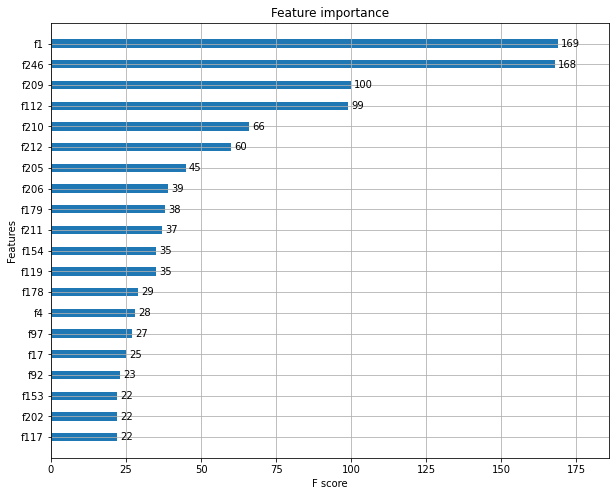

In [92]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [93]:
from sklearn.feature_selection import SelectFromModel

fs = SelectFromModel(xgb_clf, prefit = True)

In [94]:
X_train = fs.transform(X_train)
X_test = fs.transform(X_test)
test_q = fs.transform(test_q)
print(X_train.shape, X_test.shape, test_q.shape)

(60816, 78) (15204, 78) (75818, 78)


## 3-1. 학습 수행 (xgboost)
#### 1) Hyperparameter 최적화

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7],'colsample_bytree':[0.5,0.85], 'learning_rate':[0.02,0.03]}

gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
xgb_roc_score

[0]	validation_0-auc:0.713158	validation_1-auc:0.721367
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.727832	validation_1-auc:0.730754
[2]	validation_0-auc:0.801171	validation_1-auc:0.803384
[3]	validation_0-auc:0.798039	validation_1-auc:0.798723
[4]	validation_0-auc:0.793256	validation_1-auc:0.792935
[5]	validation_0-auc:0.802482	validation_1-auc:0.805617
[6]	validation_0-auc:0.800495	validation_1-auc:0.802714
[7]	validation_0-auc:0.801319	validation_1-auc:0.803493
[8]	validation_0-auc:0.799837	validation_1-auc:0.802494
[9]	validation_0-auc:0.802339	validation_1-auc:0.804373
[10]	validation_0-auc:0.801079	validation_1-auc:0.803251
[11]	validation_0-auc:0.807294	validation_1-auc:0.808832
[12]	validation_0-auc:0.807692	validation_1-auc:0.809987
[13]	validation_0-auc:0.810335	validation_1-auc:0.81214
[14]	validation_0-auc:0.809614	validation_1-auc:0.810907

0.8399930499773746

In [ ]:
gridcv.best_params_

{'colsample_bytree': 0.5, 'learning_rate': 0.03, 'max_depth': 7}

#### 2) [xgboost] 학습 및 submission 결과 추출

In [95]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.03, max_depth=7, min_child_weight=1, colsample_bytree=0.5, reg_alpha=0.03, nthread=4, subsample=0.9, seed=4242)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
xgb_roc_score

[0]	validation_0-auc:0.740192	validation_1-auc:0.74561
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.751977	validation_1-auc:0.751952
[2]	validation_0-auc:0.770982	validation_1-auc:0.770285
[3]	validation_0-auc:0.773688	validation_1-auc:0.772611
[4]	validation_0-auc:0.81535	validation_1-auc:0.809951
[5]	validation_0-auc:0.813659	validation_1-auc:0.805518
[6]	validation_0-auc:0.812706	validation_1-auc:0.804531
[7]	validation_0-auc:0.810523	validation_1-auc:0.801733
[8]	validation_0-auc:0.809612	validation_1-auc:0.801559
[9]	validation_0-auc:0.818365	validation_1-auc:0.811711
[10]	validation_0-auc:0.817972	validation_1-auc:0.810869
[11]	validation_0-auc:0.818178	validation_1-auc:0.810467
[12]	validation_0-auc:0.824293	validation_1-auc:0.815103
[13]	validation_0-auc:0.828199	validation_1-auc:0.820314
[14]	validation_0-auc:0.828116	validation_1-auc:0.818107


0.8446616356585959

In [98]:
probs = xgb_clf.predict_proba(test_q)
submission = pd.DataFrame({"ID":test_id, "TARGET":probs[:,1]})
submission.to_csv("/content/drive/My Drive/santander/submission_201011_xgboost_1.csv", index=False)

In [99]:
submission.head()

,ID,TARGET
0,2,0.042373
1,5,0.051906
2,6,0.007333
3,7,0.020858
4,9,0.007718


## #4. PCA

In [115]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

In [116]:
X_train_nor = normalize(X_train, axis=0)
X_test_nor = normalize(X_test, axis=0)
test_q_nor = normalize(test_q, axis=0)

X_train_pca = pca.fit_transform(X_train_nor)
X_test_pca = pca.fit_transform(X_test_nor)
test_q_pca = pca.fit_transform(test_q_nor)

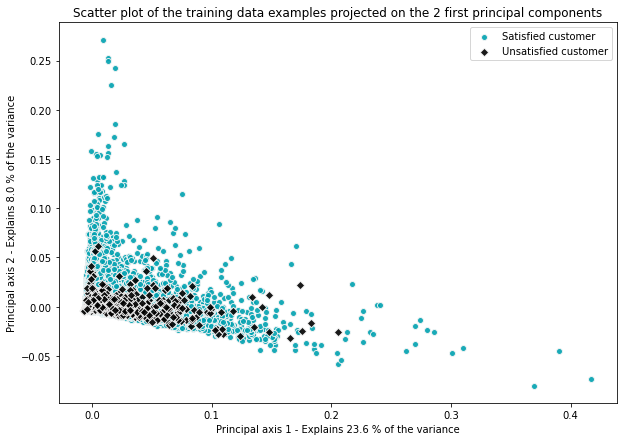

In [117]:
classes = np.sort(np.unique(y_train))
labels = ["Satisfied customer", "Unsatisfied customer"]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
colors = [(0.0, 0.63, 0.69), 'black']
markers = ["o", "D"]
for class_ix, marker, color, label in zip(classes, markers, colors, labels):
  ax.scatter(X_train_pca[np.where(y_train==class_ix), 0],
             X_train_pca[np.where(y_train==class_ix), 1],
             marker=marker, color=color, edgecolor = "whitesmoke", linewidth=1,
             alpha=0.9, label=label)
  ax.legend(loc='best')
plt.title("Scatter plot of the training data examples projected on the "
        "2 first principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
    pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
    pca.explained_variance_ratio_[1] * 100.0))
plt.show()

In [118]:
print(X_train_pca.shape, X_test_pca.shape, test_q_pca.shape)

(60816, 5) (15204, 5) (75818, 5)


In [119]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.03, max_depth=7, min_child_weight=1, colsample_bytree=0.5, reg_alpha=0.03, nthread=4, subsample=0.9, seed=4242)
xgb_clf.fit(X_train_pca, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=[(X_train_pca, y_train), (X_test_pca, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test_pca)[:,1], average='macro')
xgb_roc_score

[0]	validation_0-auc:0.758206	validation_1-auc:0.516401
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.773569	validation_1-auc:0.518825
[2]	validation_0-auc:0.772644	validation_1-auc:0.518964
[3]	validation_0-auc:0.778669	validation_1-auc:0.393478
[4]	validation_0-auc:0.780133	validation_1-auc:0.395063
[5]	validation_0-auc:0.781354	validation_1-auc:0.396704
[6]	validation_0-auc:0.783372	validation_1-auc:0.372845
[7]	validation_0-auc:0.784254	validation_1-auc:0.372268
[8]	validation_0-auc:0.786532	validation_1-auc:0.397709
[9]	validation_0-auc:0.791055	validation_1-auc:0.409337
[10]	validation_0-auc:0.792612	validation_1-auc:0.399732
[11]	validation_0-auc:0.794416	validation_1-auc:0.405086
[12]	validation_0-auc:0.795697	validation_1-auc:0.409827
[13]	validation_0-auc:0.797029	validation_1-auc:0.413208
[14]	validation_0-auc:0.797529	validation_1-auc:0.40172

0.5189641435125545

## 3-2. 학습 수행 (LightGBM)
#### 1) Hyperparameter 최적화

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32,64],
          'max_depth':[128,160],
          'min_child_samples':[60,100],
          'subsample':[0.8,1]}

In [ ]:
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

print(gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(lgbm_roc_score)

[1]	valid_0's auc: 0.823554	valid_0's binary_logloss: 0.156219	valid_1's auc: 0.820798	valid_1's binary_logloss: 0.164916
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.829602	valid_0's binary_logloss: 0.150938	valid_1's auc: 0.824674	valid_1's binary_logloss: 0.159815
[3]	valid_0's auc: 0.835085	valid_0's binary_logloss: 0.147168	valid_1's auc: 0.826003	valid_1's binary_logloss: 0.156207
[4]	valid_0's auc: 0.839626	valid_0's binary_logloss: 0.144235	valid_1's auc: 0.83037	valid_1's binary_logloss: 0.153427
[5]	valid_0's auc: 0.842434	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832747	valid_1's binary_logloss: 0.151113
[6]	valid_0's auc: 0.845739	valid_0's binary_logloss: 0.13968	valid_1's auc: 0.835154	valid_1's binary_logloss: 0.149347
[7]	valid_0's auc: 0.846345	valid_0's binary_logloss: 0.138007	valid_1's auc: 0.835698	valid_1's binary_logloss: 0.14776
[8]	valid_0's auc: 0.849153	valid_0's binary_logloss: 0.13654	valid_1's auc: 0.83691	va

NameError: ignored

In [ ]:
print(gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(lgbm_roc_score)

{'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 32, 'subsample': 0.8}
0.8412062186464128


In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=60, max_depth=128)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print(lgbm_roc_score)

[1]	valid_0's auc: 0.81744	valid_0's binary_logloss: 0.165128
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.820421	valid_0's binary_logloss: 0.159978
[3]	valid_0's auc: 0.827206	valid_0's binary_logloss: 0.156423
[4]	valid_0's auc: 0.8329	valid_0's binary_logloss: 0.153502
[5]	valid_0's auc: 0.836038	valid_0's binary_logloss: 0.151221
[6]	valid_0's auc: 0.837409	valid_0's binary_logloss: 0.149316
[7]	valid_0's auc: 0.838612	valid_0's binary_logloss: 0.147774
[8]	valid_0's auc: 0.84006	valid_0's binary_logloss: 0.146429
[9]	valid_0's auc: 0.840087	valid_0's binary_logloss: 0.145418
[10]	valid_0's auc: 0.840505	valid_0's binary_logloss: 0.14451
[11]	valid_0's auc: 0.841206	valid_0's binary_logloss: 0.143585
[12]	valid_0's auc: 0.840401	valid_0's binary_logloss: 0.143032
[13]	valid_0's auc: 0.840386	valid_0's binary_logloss: 0.142428
[14]	valid_0's auc: 0.839586	valid_0's binary_logloss: 0.142059
[15]	valid_0's auc: 0.839195	valid_0's binary_logloss: 

In [ ]:
probs = lgbm_clf.predict_proba(test_df)
submission = pd.DataFrame({"ID":test_id, "TARGET":probs[:,1]})
submission.to_csv("/content/drive/My Drive/santander/submission_201010_lgbm_1.csv", index=False)

In [ ]:
submission.head()

,ID,TARGET
0,2,0.032658
1,5,0.042919
2,6,0.015702
3,7,0.018131
4,9,0.015702
